# 🎬 Netflix Exploratory Data Analysis 📺



In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os import chdir
from warnings import filterwarnings

chdir(r"D:\Documentos\TI\Data\EDA\Datasets")
filterwarnings('ignore')

In [2]:
# Loading file
netflix_df = pd.read_csv(r"netflix_titles.csv", encoding = 'utf-8', low_memory = True)

## Data cleansing 🧹
Let's check the missing values and the data integrity overall.

### Handling missing values

In [3]:
# Quick visualization 
netflix_df.sample(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2599,s2600,TV Show,El señor de los Cielos,NaN,"Rafael Amaya, Ximena Herrera, Robinson Díaz, R...","United States, Mexico, Colombia","April 30, 2020",2019,TV-MA,7 Seasons,"Crime TV Shows, International TV Shows, Spanis...",Only Aurelio Casillas can fill Pablo Escobar's...
6287,s6288,Movie,Best Neighbors,Tamer Bassiouni,"Sameh Hussain, Menna Arafa, Merna al-Mohandes",NaN,"June 6, 2019",2014,TV-14,98 min,"Comedies, International Movies",A just-married couple moves into their new hom...
7525,s7526,Movie,Mune: Guardian of the Moon,"Alexandre Heboyan, Benoît Philippon","Joshua J. Ballard, Nicole Provost, Trevor Deva...",France,"January 26, 2018",2014,PG,85 min,Children & Family Movies,"When the old guardian of the moon retires, the..."
4173,s4174,Movie,Just Love,"Andy Caballero, Diego Corsini","Franco Masini, Yamila Saud, Victorio D'Alessan...",Argentina,"January 24, 2019",2018,TV-MA,96 min,"Dramas, International Movies, Music & Musicals",Inspired by his love affair with a conservativ...
1031,s1032,Movie,Into the Beat,Stefan Westerwelle,"Alexandra Pfeifer, Yalany Marschner, Trystan P...",Germany,"April 16, 2021",2020,TV-14,102 min,"Dramas, International Movies, Romantic Movies",A teen ballerina discovers hip-hop by chance a...
5469,s5470,Movie,Rangoon,Vishal Bhardwaj,"Saif Ali Khan, Shahid Kapoor, Kangana Ranaut, ...",India,"May 29, 2017",2017,TV-14,153 min,"Action & Adventure, Dramas, International Movies","During World War II, daredevil star Miss Julia..."
8404,s8405,Movie,The Lord of the Rings: The Return of the King,Peter Jackson,"Elijah Wood, Ian McKellen, Liv Tyler, Viggo Mo...","New Zealand, United States","January 1, 2020",2003,PG-13,201 min,"Action & Adventure, Sci-Fi & Fantasy",Aragorn is revealed as the heir to the ancient...
7371,s7372,Movie,Mad World,Chun Wong,"Shawn Yue, Eric Tsang, Elaine Jin, Charmaine Fong",Hong Kong,"September 20, 2018",2016,TV-MA,102 min,"Dramas, International Movies",A stockbroker struggling with bipolar disorder...
321,s322,TV Show,Two Fathers,NaN,"Weber Yang, Lin Yo-Wei, Megan Lai, Amanda Chou...",Taiwan,"August 3, 2021",2013,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",When two single guys learn a woman they both s...
7173,s7174,Movie,Kaviyude Osyath,Vineeth Anil,"Prakash Bare, Arun Kumar, Kulappulli Leela, Sa...",India,"July 1, 2018",2017,TV-14,116 min,"Dramas, International Movies",When a late poet leaves behind his property to...


In [4]:
# Dataset info
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
# date_added will be more useful in datetime format
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'])
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
# Number of duplicated values
print(f"Há {netflix_df.duplicated().sum()} linha(s) duplicada(s)")

Há 0 linha(s) duplicada(s)


In [7]:
# Number of missing values per column
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

There are a lot of missing values for director, cast and country.

In [8]:
# Checking the percentage of missing values
netflix_df.isnull().mean()

show_id         0.000000
type            0.000000
title           0.000000
director        0.299080
cast            0.093675
country         0.094357
date_added      0.001135
release_year    0.000000
rating          0.000454
duration        0.000341
listed_in       0.000000
description     0.000000
dtype: float64

<Figure size 720x432 with 0 Axes>

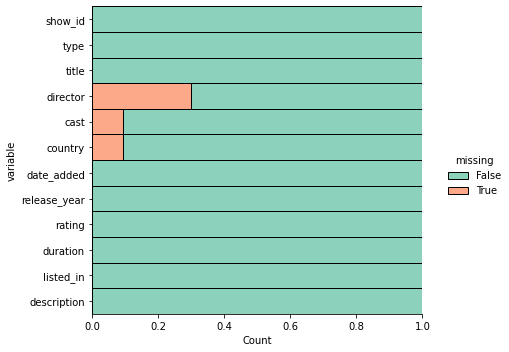

In [10]:
# Displot of the nulls
plt.figure(figsize=(10,6))
sns.displot(
    data=netflix_df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25,
    palette="Set2"
)

In [11]:
# Checking missing values in director
netflix_df[netflix_df['director'].isnull()].sample(20)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7184,s7185,TV Show,Khan: No. 1 Crime Hunter,NaN,Rajesh Sharma,India,2018-05-01,2018,TV-14,1 Season,"Crime TV Shows, International TV Shows, TV Com...","From fake marriages to online shopping fraud, ..."
6509,s6510,TV Show,Club Friday To Be Continued - The Promise,NaN,"Jirayu La-ongmanee, Focus Jirakul",NaN,2018-04-20,2016,TV-MA,1 Season,"International TV Shows, Romantic TV Shows, TV ...",Two young lovers vow to stay friends through t...
8503,s8504,TV Show,The Seventies,NaN,NaN,United States,2018-09-30,2015,TV-PG,1 Season,Docuseries,"This series examines 1970s America, focusing o..."
2883,s2884,TV Show,The Trials of Gabriel Fernandez,NaN,NaN,United States,2020-02-26,2020,TV-MA,1 Season,"Crime TV Shows, Docuseries",A boy’s brutal murder and the public trials of...
4892,s4893,Movie,Pocoyo & Cars,NaN,"Stephen Fry, Alex Marty",NaN,2018-05-01,2015,TV-Y,19 min,Movies,Pocoyo gears up for exciting car races and lea...
5601,s5602,TV Show,Nightmare High,NaN,"So-hyun Kim, Min-hyuk Lee, Ki-joon Uhm, Da-Ye ...",South Korea,2017-02-15,2016,TV-14,1 Season,"International TV Shows, Korean TV Shows, TV Dr...","After a new teacher arrives, students' dreams ..."
5575,s5576,TV Show,Cheer Squad,NaN,NaN,United States,2017-03-14,2016,TV-PG,1 Season,"Reality TV, Teen TV Shows","Follow the Great White Sharks, a world-champio..."
4015,s4016,TV Show,The Disappearance of Madeleine McCann,NaN,NaN,NaN,2019-03-15,2019,TV-14,1 Season,"Crime TV Shows, Docuseries",The documentary takes a detailed look at the d...
379,s380,TV Show,Tattoo Redo,NaN,NaN,NaN,2021-07-28,2021,TV-MA,1 Season,Reality TV,Bad tattoos walk in. Great tattoos walk out. T...
2408,s2409,TV Show,My Mister,NaN,"Lee Sun-kyun, Lee Ji-eun (IU), Go Du-sim, Park...",South Korea,2020-06-10,2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Korean...","In a world that is less than kind, a young wom..."


It seems that Ids with NaN for director are mostly TV Shows.

In [12]:
# Checking if there are more director's missing values for TV Show
netflix_df[netflix_df['director'].isnull()].value_counts('type', normalize=True)

type
TV Show    0.928626
Movie      0.071374
dtype: float64

Indeed, 92.8% of director missing values are for TV Show.

# Data analysis 🔬

## Questions:

* Movies x TV Show
* Ratings' distribution
* Top directors
* Top cast
* Top country
* Qual dia da semana tem mais produções adicionadas?
* Qual mês?
* Qual ano?
* Qual ano de produção de preferência?
* Top duration for Movies
* Top duration for TV Shows
* Top genres
* WordMap description

In [ ]:
# Number of Movies x TV Shows
sns.set(style="darkgrid")
plt.figure(figsize=(9,5))
sns.countplot(y='type', data=netflix_df, palette="Set2")

In [ ]:
# Ratings' distribution
plt.figure(figsize=(12,10))
ax = sns.countplot(x="rating", data=netflix_df, palette="Set2", order=netflix_df['rating'].value_counts().index[0:14])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

In [ ]:
# Top 10 directors
plt.figure(figsize=(10,6))
sns.countplot(y=netflix_df["director"], palette="Set2", order=netflix_df['director'].value_counts().index[0:10])

In [ ]:
# Top 10 cast
plt.figure(figsize=(9,5))
sns.countplot(y=netflix_df['cast'], palette="Set2", order=netflix_df['cast'].value_counts().index[0:10])

In [ ]:
# Top 10 countries
plt.figure(figsize=(9,5))
sns.countplot(y=netflix_df['country'], palette="Set2", order=netflix_df['country'].value_counts().index[0:10])

In [ ]:
# 